# HR analysis
## HR-> human resource
## customer churn-> the number of employee who are at notice period

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
data = pd.read_csv(r"C:\Users\HARSHIT JAIN\Desktop\data science projects\HR ANALYTICS\people.csv")

In [3]:
data.head(30)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low


In [4]:
data.shape

(14999, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.isnull()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()  #0 false  1 true

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

# data can be manipulated by two things 
## null values  -> no null values -> drop the null values,fill them with(mean,mode mdeian)
## duplicates-> drop duplicates

In [8]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995    False
14996    False
14997    False
14998    False
Length: 14999, dtype: bool

In [9]:
data[data.duplicated()] #number of rows as duplicated value

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
263,0.46,0.57,2,139,3,0,1,0,sales,low
877,0.37,0.51,2,127,3,0,1,0,sales,medium
974,0.42,0.53,2,142,3,0,1,0,sales,low
1017,0.40,0.50,2,127,3,0,1,0,IT,low
1241,0.10,0.85,6,266,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.95,0.84,3,270,3,1,0,1,sales,medium
14987,0.37,0.45,2,126,3,0,1,0,support,medium
14988,0.43,0.57,2,157,3,0,1,0,sales,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high


In [10]:
data= data.drop_duplicates()

In [11]:
data.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# visualiztion

# employee turnover

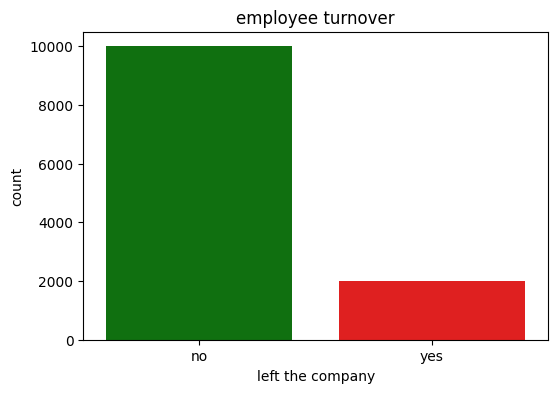

In [12]:
#create bar chart
plt.figure(figsize=(6,4))
sns.countplot(data = data,x='left',palette = ["green","red"])
plt.title('employee turnover')
plt.xlabel('left the company')
plt.ylabel('count')
plt.xticks([0,1],['no','yes'])
plt.show()
        

# create a historam to visulize the distibution of satisafaction level

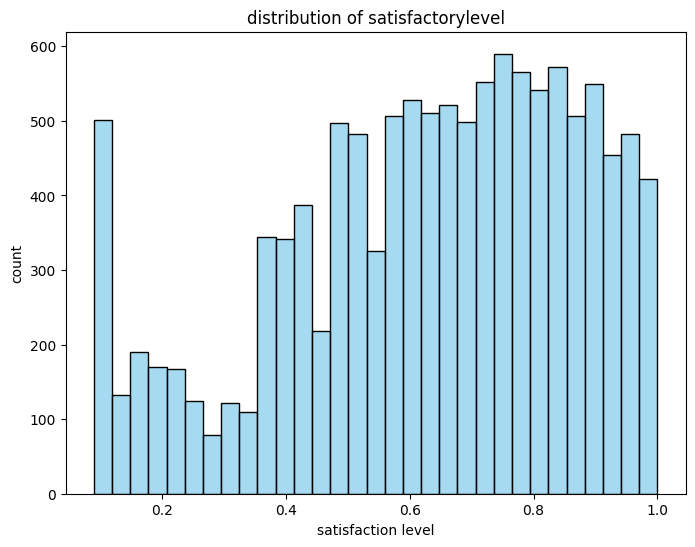

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="satisfactoryLevel",color='skyblue')
plt.title("distribution of satisfactorylevel")
plt.xlabel('satisfaction level')
plt.ylabel('count')
plt.show()

# Biased columns
# ! satisfactory level
# 2 last evaluation

# avg monthly hours -> semi biased

# importan column

# # number of projects
# # timespent.company
# # salary
# # left -> 0 person for not leaving,1 leaving
# # promotion in last 5 years
# # dept

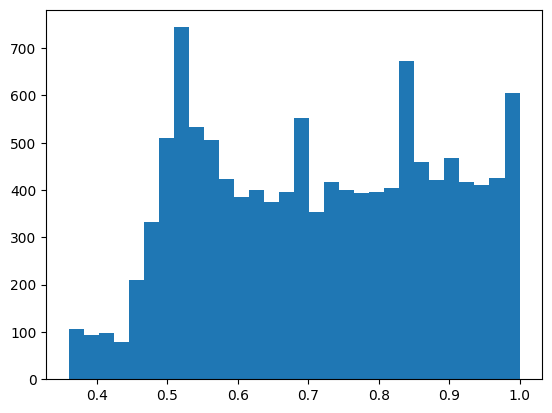

In [14]:
plt.hist(data['lastEvaluation'], bins=30)
plt.show()


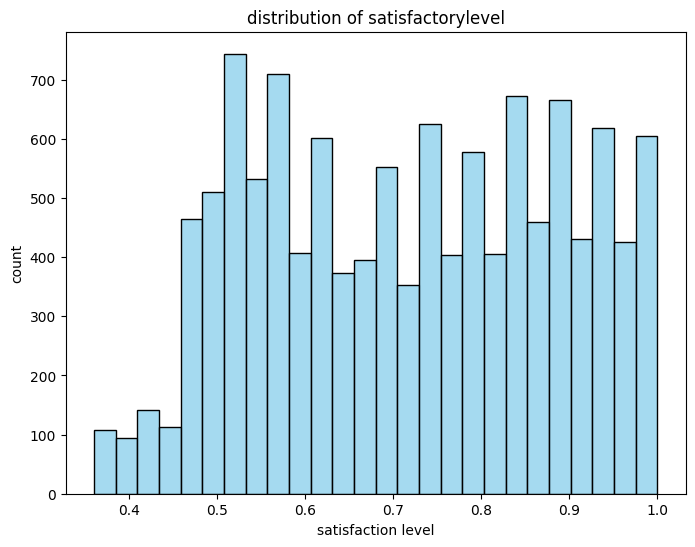

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="lastEvaluation",color='skyblue')
plt.title("distribution of satisfactorylevel")
plt.xlabel('satisfaction level')
plt.ylabel('count')
plt.show()

<Axes: xlabel='numberOfProjects', ylabel='count'>

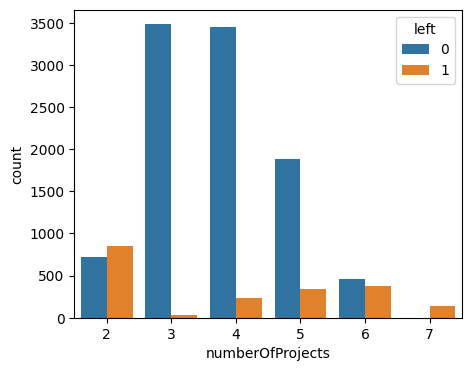

In [17]:
#number of projects

fig=plt.figure(figsize=(5,4))
sns.countplot(data=data,x="numberOfProjects",hue="left")


# if number of projects divied evenly to all

# workaccident vs left

<Axes: xlabel='workAccident', ylabel='count'>

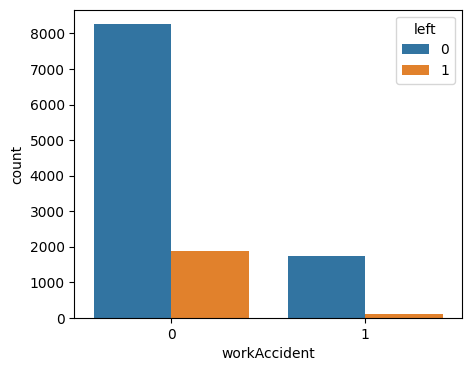

In [18]:
fig=plt.figure(figsize=(5,4))
sns.countplot(data=data,x="workAccident",hue="left")

# inference-> we have to reduce workaccidents
# suggestion-> nil

# promotionin last 5years vs left

<Axes: xlabel='promotionInLast5years', ylabel='count'>

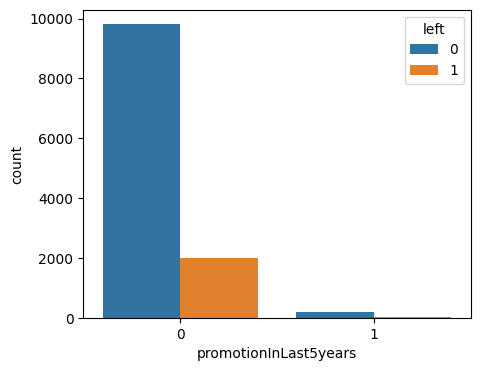

In [19]:
fig=plt.figure(figsize=(5,4))
sns.countplot(data=data,x="promotionInLast5years",hue="left")

In [20]:
data[data["timeSpent.company"] > 5].sum()

satisfactoryLevel                                                   493.31
lastEvaluation                                                      599.27
numberOfProjects                                                      3321
avgMonthlyHours                                                     168864
timeSpent.company                                                     5628
workAccident                                                           148
left                                                                   109
promotionInLast5years                                                   42
dept                     salessaleshrsupportsalesmarketingtechnicalsupp...
salary                   mediumlowlowlowmediumlowmediumlowlowlowlowlowm...
dtype: object

# we can provide time to time promotion

<Axes: xlabel='dept', ylabel='count'>

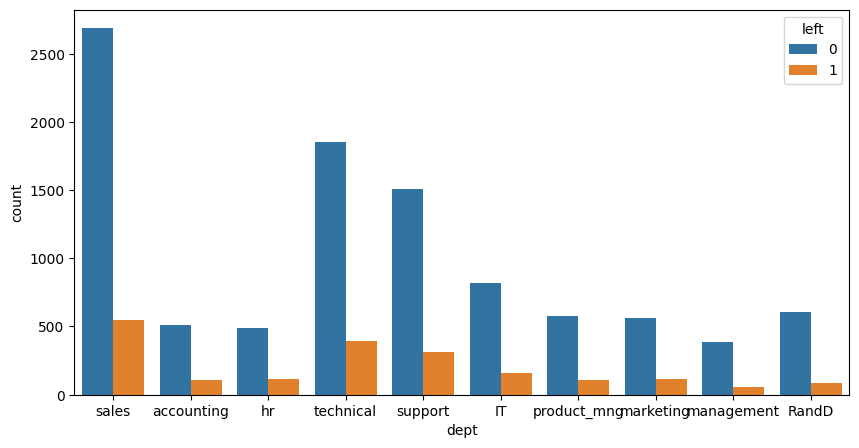

In [21]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=data,x="dept",hue="left")

#  inference- people from sales support technical are leaving the company most
# suggestions->give option to move to another dept
# 2 incentives
# team mangement
# take them outings

<Axes: xlabel='salary', ylabel='count'>

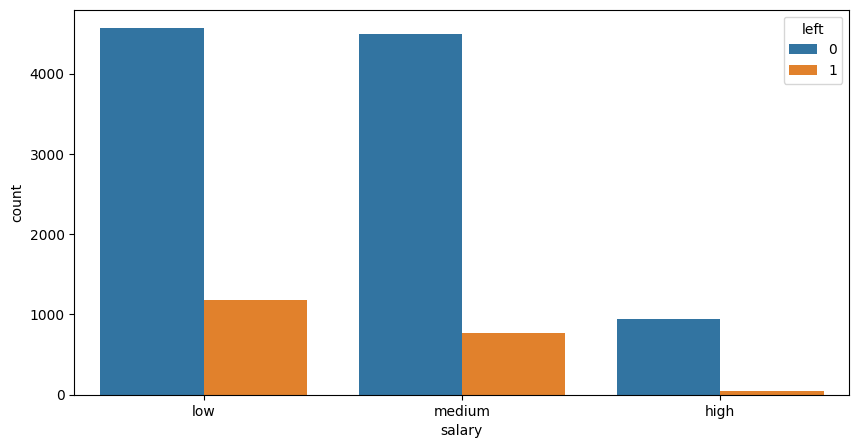

In [22]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=data,x="salary",hue="left")

# inferences- employeeswith low/medium salary are leaving most

# suggestions->regular sal hike
# markest salary we have to proivde
# incentives + promotion +project changes